In [1]:
load('relacije.sage')

U paketu se nalaze funkcije za:
KREIRANJE RELACIJA: relacija_formula, relacija_matrica, relacija_elementi, relacija_graf
ZA ISPISIVANJE TABLICA S OZNAKAMA REDAKA I STUPACA: matrica_table, matrica_html
ISPITIVANJE SVOJSTAVA RELACIJA: refleksivna, irefleksivna, simetricna, antisimetricna, asimetricna, kompletna, strogo_kompletna, tranzitivna, relacija_ekvivalencije, parcijalni_uredjaj, linearni_uredjaj
SPECIJALNE FUNKCIJE ZA PARCIJALNI UREDJAJ: matrica_incidencije_PUS, elementi_PUS, lower_bounds, upper_bounds
FUNKCIJE ZA ODREDJIVANJE ZATVORENJA RELACIJA: refleksivno_zatvorenje, simetricno_zatvorenje, tranzitivno_zatvorenje, ekvivalencija_zatvorenje
FUNKCIJA KOJA ODREDJUJE KLASE EKVIVALENCIJE KOD RELACIJE EKVIVALENCIJE: klase_ekvivalencije


### 3. zadatak

In [2]:
A = [1,2,3,4] 
rho = [(1,1), (1,2), (2,1), (3,4)]
mat3 = relacija_elementi(A, rho)
matrica_html(mat3, A, A)

1   2   3   4
  1   1   1   0   0
  2   1   0   0   0
  3   0   0   0   1
  4   0   0   0   0

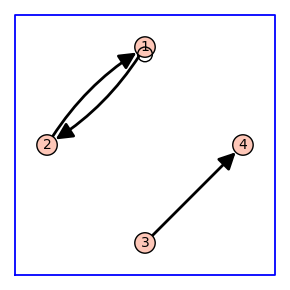

In [3]:
relacija_elementi(A, rho, izlaz="graf").show(figsize=[3,3])

In [4]:
refleksivna(mat3),simetricna(mat3),antisimetricna(mat3),tranzitivna(mat3)

(False, False, False, False)

### 4. zadatak

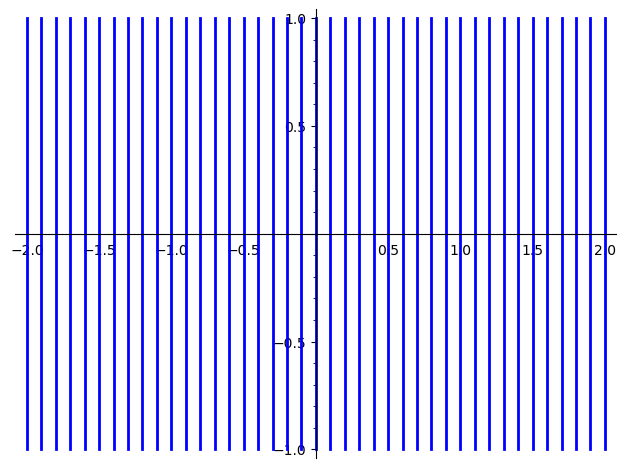

In [5]:
import numpy as np
slika = Graphics()
for a in np.arange(-2,2.1,0.1):
    slika += line([(a,-1),(a,1)],thickness=2)
show(slika)

### 5. zadatak

In [6]:
A = [2,4,6,9,12,18,27,36,48,60,72]
relA = lambda a,b: mod(a,b) == 0
pusA = Poset((A,relA))

##### Matrica incidencije

In [7]:
mat5 = relacija_formula(A,relA,izlaz="matrica")
matrica_html(mat5, A, A)

2   4   6   9   12   18   27   36   48   60   72
  2    1   0   0   0   0    0    0    0    0    0    0
  4    1   1   0   0   0    0    0    0    0    0    0
  6    1   0   1   0   0    0    0    0    0    0    0
  9    0   0   0   1   0    0    0    0    0    0    0
  12   1   1   1   0   1    0    0    0    0    0    0
  18   1   0   1   1   0    1    0    0    0    0    0
  27   0   0   0   1   0    0    1    0    0    0    0
  36   1   1   1   1   1    1    0    1    0    0    0
  48   1   1   1   0   1    0    0    0    1    0    0
  60   1   1   1   0   1    0    0    0    0    1    0
  72   1   1   1   1   1    1    0    1    0    0    1

##### Hasseov dijagram

In [8]:
pusA.show(vertex_color='yellow',figsize=[4,4],vertex_size=500,axes_pad=0.1)

##### Minimalni elementi

In [9]:
pusA.minimal_elements()

[72, 60, 48, 27]

##### Maksimalni elementi

In [10]:
pusA.maximal_elements()

[9, 2]

Ne postoji najmanji element

In [11]:
pusA.has_bottom()

False

Ne postoji najveći element

In [12]:
pusA.has_top()

False

Donje međe podskupa $\{4,6\}$ su $12,36,48,60,72$, a njegov infimum je $12$.

In [13]:
lower_bounds(pusA, [4,6])

([72, 60, 48, 36, 12], 12)

Jedina gornja međa podskupa $\{4,6\}$ je $2$, što je ujedno i njegov supremum.

In [14]:
upper_bounds(pusA, [4,6])

([2], 2)

Podskup $\{12,18,48\}$ nema donjih međi pa nema niti infimum.

In [15]:
lower_bounds(pusA, [12,18,48])

([], None)

Gornje međe podskupa $\{12,18,48\}$ su $2$ i $6$, a njegov supremum je $6$.

In [16]:
upper_bounds(pusA, [12,18,48])

([6, 2], 6)

Zadani parcijalno uređeni skup nije mreža jer npr. njegov dvočlani podskup $\{60,72\}$ nema infimum.

In [17]:
pusA.is_lattice()

False

In [18]:
lower_bounds(pusA, [60,72])

([], None)

### 6. zadatak

In [19]:
T = list(filter(lambda x: len(x) % 2 != 0, Subsets(4)))
T

[{1}, {2}, {3}, {4}, {1, 2, 3}, {1, 2, 4}, {1, 3, 4}, {2, 3, 4}]

In [20]:
pusT = Poset((T, lambda x,y: x & y == x))

##### Matrica incidencije

In [21]:
mat6 = relacija_formula(T , lambda x,y: x & y == x, izlaz="matrica")
matrica_html(mat6, T, T)

{1}   {2}   {3}   {4}   {1, 2, 3}   {1, 2, 4}   {1, 3, 4}   {2, 3, 4}
  {1}         1     0     0     0     1           1           1           0
  {2}         0     1     0     0     1           1           0           1
  {3}         0     0     1     0     1           0           1           1
  {4}         0     0     0     1     0           1           1           1
  {1, 2, 3}   0     0     0     0     1           0           0           0
  {1, 2, 4}   0     0     0     0     0           1           0           0
  {1, 3, 4}   0     0     0     0     0           0           1           0
  {2, 3, 4}   0     0     0     0     0           0           0           1

##### Hasseov dijagram

In [22]:
pusT.show(vertex_color='yellow',figsize=[8,10],vertex_size=2000,axes_pad=0.2)

##### Minimalni elementi

In [23]:
pusT.minimal_elements()

[{4}, {3}, {2}, {1}]

##### Maksimalni elementi

In [24]:
pusT.maximal_elements()

[{2, 3, 4}, {1, 2, 3}, {1, 2, 4}, {1, 3, 4}]

Ne postoji najmanji element

In [25]:
pusT.has_bottom()

False

Ne postoji najveći element

In [26]:
pusT.has_top()

False

Primjeri podskupova koji imaju gornje međe, ali nemaju supremum

In [27]:
upper_bounds(pusT,[Set({1}),Set({3})])

([{1, 2, 3}, {1, 3, 4}], None)

In [28]:
upper_bounds(pusT,[Set({1}),Set({2})])

([{1, 2, 3}, {1, 2, 4}], None)

In [29]:
upper_bounds(pusT,[Set({1}),Set({4})])

([{1, 2, 4}, {1, 3, 4}], None)

Primjeri podskupova koji imaju gornje međe i supremum

In [30]:
upper_bounds(pusT,[Set({1}),Set({2}),Set({3})])

([{1, 2, 3}], {1, 2, 3})

In [31]:
upper_bounds(pusT,[Set({1}),Set({2}),Set({4})])

([{1, 2, 4}], {1, 2, 4})

Primjeri podskupova koji imaju donje međe, ali nemaju infimum

In [32]:
lower_bounds(pusT,[Set({2,3,4}),Set({1,2,3})])

([{3}, {2}], None)

In [33]:
lower_bounds(pusT,[Set({2,3,4}),Set({1,2,4})])

([{4}, {2}], None)

In [34]:
lower_bounds(pusT,[Set({1,3,4}),Set({1,2,3})])

([{3}, {1}], None)

Primjeri podskupova koji imaju donje međe i infimum

In [35]:
lower_bounds(pusT,[Set({2,3,4}),Set({2})])

([{2}], {2})

### 7. zadatak

In [36]:
skup = ['M1','M2','M3','M4','M5']
relacija = [('M1','M3'),('M1','M4'),('M2','M3'),('M4','M3'),('M5','M3'),('M5','M4')]
pus7 = Poset((skup, relacija))

In [37]:
mat7 = matrica_incidencije_PUS((skup,relacija))
matrica_html(mat7, skup, skup)

M1   M2   M3   M4   M5
  M1   1    0    1    1    0
  M2   0    1    1    0    0
  M3   0    0    1    0    0
  M4   0    0    1    1    0
  M5   0    0    1    1    1

##### a) dio

In [38]:
parcijalni_uredjaj(mat7)

True

##### b) dio

In [39]:
pus7.show(vertex_color='yellow',figsize=[4,4],vertex_size=500,axes_pad=0.1)

##### c) dio

In [40]:
pus7.top()

'M3'

##### d) dio

In [41]:
pus7.has_bottom()

False

In [42]:
pus7.minimal_elements()

['M5', 'M2', 'M1']